# Question 9

* Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.


Links : 

* https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
# Core
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")

# Sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization


In [ ]:
# load the data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# normalize
X_train_full = X_train_full / 255.
X_test = X_test / 255.

# splitting the dataset into train, test, valid 
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:] # 55000 instances for training set
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:] # 5000 instances for validation set

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Training set : ", X_train.shape)
print("Validation set : ", X_valid.shape)
print("Test set : ", X_test.shape)
# 1 for color channel

Training set :  (55000, 28, 28, 1)
Validation set :  (5000, 28, 28, 1)
Test set :  (10000, 28, 28, 1)


In [ ]:
print("Training label : ", y_train.shape)
print("Validation label: ", y_valid.shape)
print("Test label : ", y_test.shape)

Training label :  (55000,)
Validation label:  (5000,)
Test label :  (10000,)


In [ ]:
y_train[0]

5

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
#one hot encoded depilse bu sparse kllanılır loss func olarak
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
# Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 249s 144ms/step - loss: 0.2001 - accuracy: 0.9401 - val_loss: 0.0559 - val_accuracy: 0.9858
Epoch 2/10
1719/1719 [==============================] - 240s 140ms/step - loss: 0.0854 - accuracy: 0.9740 - val_loss: 0.0469 - val_accuracy: 0.9870
Epoch 3/10
1719/1719 [==============================] - 246s 143ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0404 - val_accuracy: 0.9898
Epoch 4/10
1719/1719 [==============================] - 239s 139ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 5/10
1719/1719 [==============================] - 240s 140ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0327 - val_accuracy: 0.9916
Epoch 6/10
1719/1719 [==============================] - 246s 143ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0491 - val_accuracy: 0.9896
Epoch 7/10
1719/1719 [==============================] - 239s 139ms/step - loss: 0.0334 - accuracy: 0.9896 - val_

[0.027015408501029015, 0.9926000237464905]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

* The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the MNIST Kaggle competition (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in this post). Can you do better? To reach 99.5 to 99.7% accuracy on the test set, you need to add image augmentation, batch norm, use a learning schedule such as 1-cycle, and possibly create an ensemble.

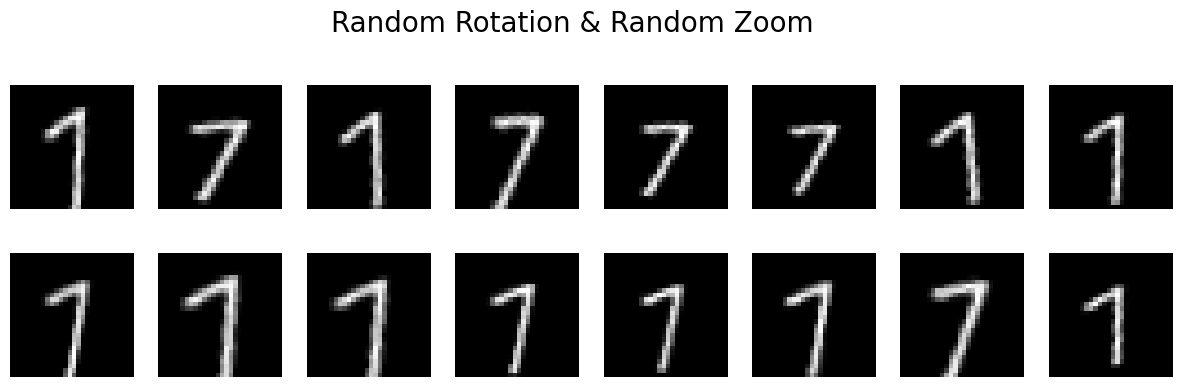

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range = 18,           # 18 degrees
    zoom_range=0.2,                # 20 %
    fill_mode='constant',          # edge pixels
    cval=0                         # fill value
)

aug = datagen.flow(X_train[42].reshape(-1, 28, 28, 1)) # itaretor

# Plot using a for loop
fig, axes = plt.subplots(2, 8, figsize = (15, 4))
plt.suptitle('Random Rotation & Random Zoom', fontsize=20, y=1.05)
axes = axes.ravel()

for i in range(16):
    
    aug_img = next(aug)[0]
    axes[i].imshow(aug_img, cmap = 'gray')
    axes[i].axis('off')
    
plt.show()

In [ ]:
# Define model
def build_model():
    model = keras.Sequential([

        # Data Augmentation
        preprocessing.RandomRotation(factor=0.05, fill_mode='constant'),     # 18 degrees
        preprocessing.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2), fill_mode='constant'),  # 20%

        # Convolutional layer 1
        layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same', input_shape=[28,28,1], activation='relu'),
        layers.MaxPool2D(pool_size=2, padding='same'),
        layers.Dropout(rate=0.3),

        # Convolutional layer 2
        layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=4, padding='same'),
        layers.Dropout(rate=0.3),
        layers.Flatten(),

        # Hidden layer 3
        layers.Dense(units=256, activation='relu'),
        layers.Dropout(rate=0.4),

        # Output layer (softmax returns a probability distribution)
        layers.Dense(units=10, activation='softmax')
    ])

    # Define optimizer, loss function and accuracy metric
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    return model

In [ ]:
# Define early stopping callback on validation loss
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
)

# Reduce learning rate when validation loss plateaus
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5
)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = build_model()
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping, reduce_lr])
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 232s 134ms/step - loss: 0.2740 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.0552 - val_sparse_categorical_accuracy: 0.9846 - lr: 0.0010
Epoch 2/10
1719/1719 [==============================] - 245s 143ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9662 - val_loss: 0.0348 - val_sparse_categorical_accuracy: 0.9894 - lr: 0.0010
Epoch 3/10
1719/1719 [==============================] - 239s 139ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.0331 - val_sparse_categorical_accuracy: 0.9922 - lr: 0.0010
Epoch 4/10
1719/1719 [==============================] - 222s 129ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9752 - val_loss: 0.0308 - val_sparse_categorical_accuracy: 0.9930 - lr: 0.0010
Epoch 5/10
1719/1719 [==============================] - 221s 128ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.0411 - val_sparse_categorical_accuracy: 0.9904 - lr: 0.0010
Epoch

[0.021423956379294395, 0.993399977684021]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping, reduce_lr])
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 307s 177ms/step - loss: 0.3615 - accuracy: 0.8987 - val_loss: 0.0887 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 2/10
1719/1719 [==============================] - 294s 171ms/step - loss: 0.1772 - accuracy: 0.9518 - val_loss: 0.0679 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 3/10
1719/1719 [==============================] - 284s 165ms/step - loss: 0.1302 - accuracy: 0.9635 - val_loss: 0.0585 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 4/10
1719/1719 [==============================] - 288s 167ms/step - loss: 0.1077 - accuracy: 0.9693 - val_loss: 0.0500 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 5/10
1719/1719 [==============================] - 284s 165ms/step - loss: 0.0922 - accuracy: 0.9746 - val_loss: 0.0545 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 6/10
1719/1719 [==============================] - 282s 164ms/step - loss: 0.0789 - accuracy: 0.9771 - val_loss: 0.0453 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 7/10
1719/1719 [============

[0.04113473370671272, 0.9898999929428101]

* Normal CNN : 99.26
* Data Augmentation : 99.33
* Batch Normalization : 98.98
